In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression

/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv("dataset/preprocessed.csv")
data.shape


(762106, 44)

In [3]:
data = data.drop(data[data.target == -1].index)
data.shape


(762094, 44)

In [4]:
# Separate input features and target
targets = data.target
targets.head()

0    3
1    5
2    2
3    2
4    1
Name: target, dtype: int64

In [5]:
targets -= 1
targets.head()


0    2
1    4
2    1
3    1
4    0
Name: target, dtype: int64

In [6]:
targets = targets.to_numpy()


In [7]:
features = data.drop('target', axis=1)


In [8]:
features = features.to_numpy()

In [9]:
X_trainAndVal, X_test, y_trainAndVal, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 0)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_trainAndVal, y_trainAndVal, test_size = 0.2, random_state = 0)#%%

In [11]:
X_train.shape

(487740, 43)

In [12]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1      2      3      4]
 [ 50166  55949  87609 117459 176557]]


In [13]:
sm = SMOTETomek(random_state = 27, n_jobs = -1)

X_train, y_train = sm.fit_sample(X_train, y_train)

/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)
/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'm' is deprecated from 0.2 and will be removed in 0.4. Use 'm_neighbors' instead.
  category=DeprecationWarning)


In [14]:
X_train.shape

(760449, 43)

In [15]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1      2      3      4]
 [162635 155765 149211 144863 147975]]


In [16]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(solver= 'saga', n_jobs = -1, multi_class = 'multinomial')

In [19]:
import datetime
a = datetime.datetime.now().replace(microsecond=0)
logisticRegr.fit(X_train, y_train)
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)

0:02:17


/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [20]:
a = datetime.datetime.now().replace(microsecond=0)
predictions = logisticRegr.predict(X_test)
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)

0:00:00


In [21]:
# Use score method to get accuracy of model
a = datetime.datetime.now().replace(microsecond=0)

score = logisticRegr.score(X_test, y_test)
print(score)
b = datetime.datetime.now().replace(microsecond=0)
print("time ",b-a)

0.39564621208641965
time  0:00:00


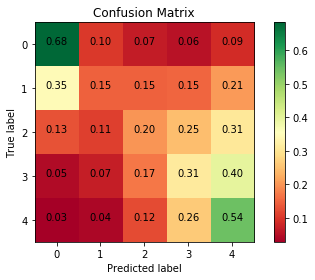

array([[0.68294821, 0.10457762, 0.06850773, 0.0557956 , 0.08817083],
       [0.34667739, 0.14726322, 0.14858423, 0.15197289, 0.20550227],
       [0.13343874, 0.1106045 , 0.20116929, 0.24665392, 0.30813355],
       [0.04658807, 0.07179724, 0.16975443, 0.31261545, 0.39924481],
       [0.02883829, 0.04135851, 0.12496593, 0.26232487, 0.5425124 ]])

In [22]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm, interpolation='nearest',cmap="RdYlGn")
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(5):
    for j in range(5):
        plt.text(j,i,format(cm[i][j],".2f"),horizontalalignment="center",color="black")
plt.tight_layout()
plt.show()
cm
